**Advanced Regression Assignment**

Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.

**Goals**

-Model the price of houses with the available independent variables. 
-Which are significsant variables
-Understand how exactly the prices vary with the variables

In [504]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#regression model directories
import statsmodels
import statsmodels.api as sm
import sklearn

# specfic classes from libraries for model fitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE

In [505]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

**READING THE DATA SET AND OVERALL ANALYSIS**

In [506]:
# Reading the data and overall assesment of the data
df = pd.read_csv('C:\\Users\\User\\Documents\\UpGRAD-ML\\4.Logistic Regression\\Advanced Regression Assignment\\train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [507]:
# Overall rows and columns in the data
df.shape

(1460, 81)

In [508]:
# Check for duplicate values

df[df.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


There are no duplicated entries

In [509]:
# Assess the null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**ANALYSIS OF VARIABLES**

**Identification of Dependant Variable**

'SalePrice' is the dependant variable.The varation in this variable wrt other varables will be studied.

**Columns irrelevant to analysis**

Id is the Index and can be dropped.

**Columns with Insufficient data**
A number of columns have null data. As there are 1460 rows,it would be prudent to drop any columns that have a very large number of null data. It is also observed that columns with most number of null values are those of categorical type. Thus we can drop all columns that have a non-null count of less than 1000.

In [510]:
df.pop('Id')# Dropping Index             

for column in df.columns:
    if df[column].count() < 1000: # Identifying Columns where less than 1000 rows are filled. Rest all are null values.
        df.pop(column)            # Discarding columns with null/ insufficient data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

**Cleaning Numerical Data**

In this section, numerical data will be identified, null values will be parsed and imputed.

In [511]:
# identifying columns with null values in the numerical data

df.select_dtypes(include=['int64','float']).isnull().sum()[df.select_dtypes(include=['int64','float']).isnull().sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

Mean of LotFrontage:  70.04995836802665
Median of LotFrontage:  69.0
Mode of LotFrontage:  0    60.0
dtype: float64


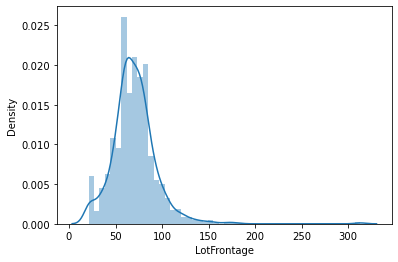

In [512]:
#Checking the distribution of LotFrontage
print('Mean of LotFrontage: ', df['LotFrontage'].mean() )
print('Median of LotFrontage: ', df['LotFrontage'].median() )
print('Mode of LotFrontage: ', df['LotFrontage'].mode() )
sns.distplot(df['LotFrontage'])
plt.show()

The variable 'LotFrontage' has a fairly uniform distribution. The mean of the value may be used for imputaton of zero values

Mean of MasVnrArea:  103.68526170798899
Median of MasVnrArea:  0.0
Mode of MasVnrArea:  0    0.0
dtype: float64


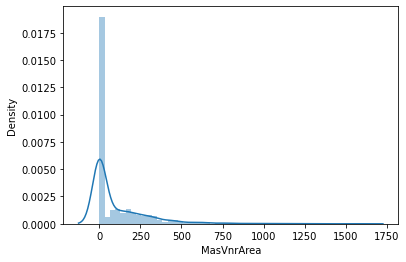

In [513]:
#Checking the distribution of MasVnrArea
print('Mean of MasVnrArea: ',df['MasVnrArea'].mean() )
print('Median of MasVnrArea: ', df['MasVnrArea'].median() )
print('Mode of MasVnrArea: ', df['MasVnrArea'].mode() )
sns.distplot(df['MasVnrArea'])
plt.show()

The distribution of MasVnrArea is not uniform and the median of the variable can be used for imputation of zero values

Mean of GarageYrBlt:  1978.5061638868744
Median of GarageYrBlt:  1980.0
Mode of GarageYrBlt:  0    2005.0
dtype: float64


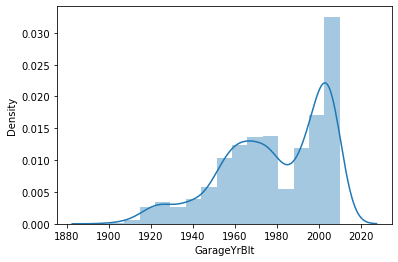

In [514]:
#Checking the distribution of GarageYrBlt
print('Mean of GarageYrBlt: ', df['GarageYrBlt'].mean() )
print('Median of GarageYrBlt: ',df['GarageYrBlt'].median() )
print('Mode of GarageYrBlt: ', df['GarageYrBlt'].mode() )
sns.distplot(df['GarageYrBlt'])
plt.show()

The distribution is not uniform and the mode of the variable can be used for imputation of zero values

In [515]:
# Making a correlation matrix of all numerical variables
corr = df.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


The correlation matrix brings out the following wrt the variables under consideration for zero imputation. 
 - LotFrontage and MasVnrArea do not show any large correlation with the other variables. Thus their values need to be imputed    as rec above.
 - GarageYrBlt is the year of building the garage has a high correlation with the variable 'YearBuilt' which is the year of the    construction of the house. Thus it may be possible to remove the variable from the analysis rather than imputing its values.

In [516]:
#Dropping the variable GarageYrBlt
df.pop('GarageYrBlt')

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1455    1999.0
1456    1978.0
1457    1941.0
1458    1950.0
1459    1965.0
Name: GarageYrBlt, Length: 1460, dtype: float64

In [517]:
#Imputing the values of LotFrontage with its mean and the values of MasVnrARea with its median
df['LotFrontage'] =df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())


In [518]:
df.select_dtypes(include=['int64','float']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1460 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [519]:
# Dropping columns that have more than 1200 (>80%) values associated to a specific value so that the values are not biased


def SameValueHigh():
    same_high = []
    for col in (df.select_dtypes(include=['int64', 'float'])):
        if(df[col].value_counts().max() >= 1200):
            same_high.append(col)
    return same_high
column_n = SameValueHigh()
df.drop(column_n , axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192,84,12,2008,WD,Normal,250000


In [520]:
# Making a correlation matrix of all numerical variables
corr = df.select_dtypes(include=['int64', 'float']).corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.140759,...,-0.023438,0.040380,-0.045569,-0.040110,-0.098672,-0.012579,-0.006100,-0.013585,-0.021407,-0.084284
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.178699,0.215828,0.122156,...,0.237023,0.320146,0.235755,0.269729,0.323663,0.077106,0.137454,0.010158,0.006768,0.334901
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,-0.002618,...,0.119690,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,0.308159,...,0.101676,0.427452,0.396765,0.600671,0.562022,0.238923,0.308819,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,-0.136841,...,0.012980,-0.057583,-0.023820,-0.185758,-0.151521,-0.003334,-0.032589,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,0.149040,...,-0.070651,0.095589,0.147716,0.537850,0.478954,0.224880,0.188686,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,0.181133,...,-0.040581,0.191740,0.112581,0.420622,0.371600,0.205726,0.226298,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178699,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,0.113862,...,0.102775,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.495251,...,-0.107355,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.015727,0.014359,0.386420
BsmtUnfSF,-0.140759,0.122156,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,1.000000,...,0.166643,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,0.034888,-0.041258,0.214479


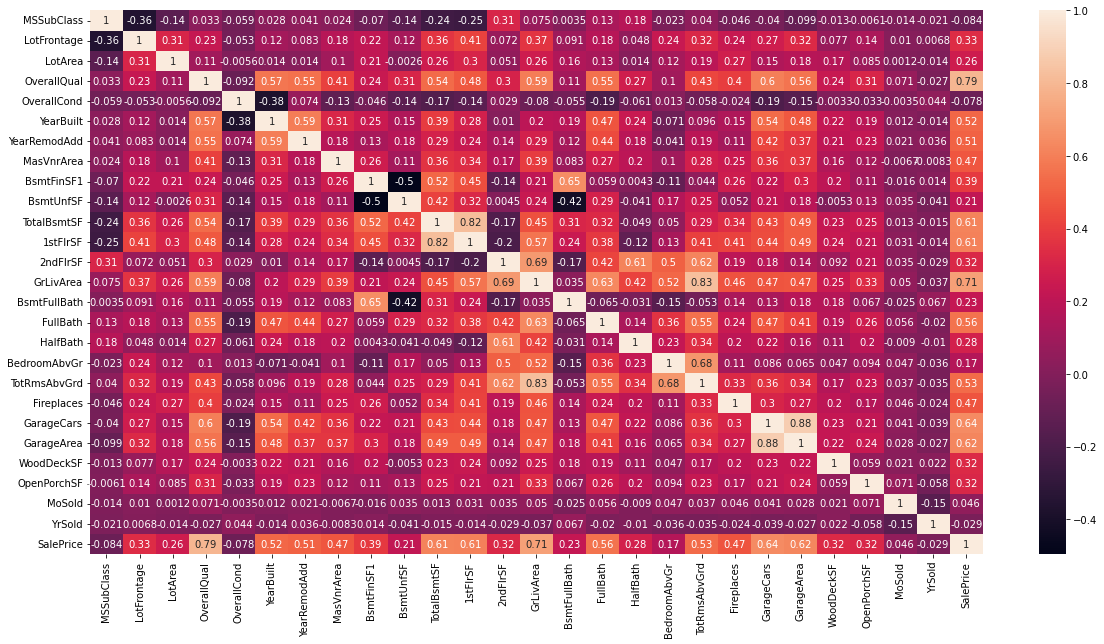

In [521]:
#Plotting Heat Map
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True)
plt.show()

TotalBsmtSF and 1stFlrSf have a correlation of 0.82

GrLivArea and TotRmsAbvGr have a correlation of 0.83

GarageCars and GarageArea have a correlation of 0.88

Either one variable of the above pairs can be dropped

In [522]:
#dropping 'TotalBsmtSF' ,'TotRmsAbvGr' and 'GarageCars' on the basis of their correlation with SalePrice
df.drop(['TotalBsmtSF' ,'TotRmsAbvGrd', 'GarageCars'], axis = 1, inplace = True)

**Checking and removing outliers**

In [523]:
# Checking percentile distribution at 25%,50%,75%,90%,95% and above

df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,567.240411,...,1.565068,0.382877,2.866438,0.613014,472.980137,94.244521,46.660274,6.321918,2007.815753,180921.195890
std,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,441.866955,...,0.550916,0.502885,0.815778,0.644666,213.804841,125.338794,66.256028,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,1.000000,0.000000,2.000000,0.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,477.500000,...,2.000000,0.000000,3.000000,1.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,808.000000,...,2.000000,1.000000,3.000000,1.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,1232.000000,...,2.000000,1.000000,4.000000,1.000000,757.100000,262.000000,130.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,1468.000000,...,2.000000,1.000000,4.000000,2.000000,850.100000,335.000000,175.050000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,1797.050000,...,3.000000,1.000000,5.000000,2.000000,1002.790000,505.460000,285.820000,12.000000,2010.000000,442567.010000


In [524]:
#Identifying columns with outliers 
col_outlier = []
for columns in df.select_dtypes(include=['int64','float']):
    if df[columns].max() > df[columns].quantile(.99):
        col_outlier.append(columns)
print(col_outlier)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']


The following variables are selected for outlier treatment 'LotArea', 'MasVnrArea', 'TotalBsmtSF','WoodDeckSF', 'OpenPorchSF'

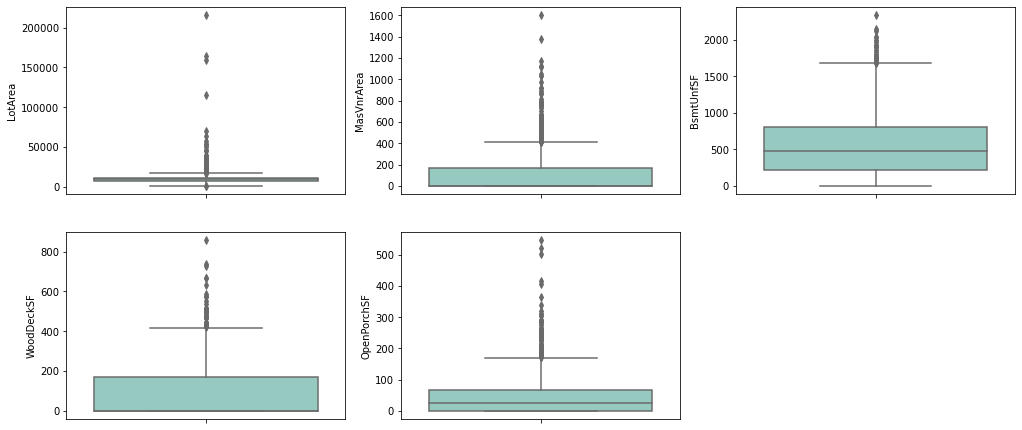

In [525]:
plt.figure(figsize=(17, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set3', data = df)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set3', data = df)
plt.subplot(5,3,3)
sns.boxplot(y = 'BsmtUnfSF', palette='Set3', data = df)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set3', data = df)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set3', data = df)
plt.show()


In [526]:
# Removing Outliers

# Removing values beyond 98% for LotArea

LotAreaOutlier = df['LotArea'].quantile(0.98)
df = df[df["LotArea"] < LotAreaOutlier ]

# Removing values beyond 98% for MasVnrArea

MasVnrAreaOutlier = df['MasVnrArea'].quantile(0.98)
df = df[df["MasVnrArea"] < MasVnrAreaOutlier]

# Removing values beyond 99% for TotalBsmtSF

BsmtFinSF1Outlier = df['BsmtFinSF1'].quantile(0.99)
df = df[df['BsmtFinSF1'] < BsmtFinSF1Outlier]

# Removing values beyond 99% for WoodDeckSF

WoodDeckSFOutlier = df['WoodDeckSF'].quantile(0.99)
df = df[df["WoodDeckSF"] < WoodDeckSFOutlier]

# Removing values beyond 99% for OpenPorchSF

OpenPorchSFOutlier = df['OpenPorchSF'].quantile(0.99)
df = df[df["OpenPorchSF"] < OpenPorchSFOutlier]

In [527]:
# Determinig the percentage of data retained

num_data = round(100*(len(df)/1460),2)
print(num_data)

93.01


Loss of data after outlier treatment is not significant

**Checking uniformity of tgt variable**

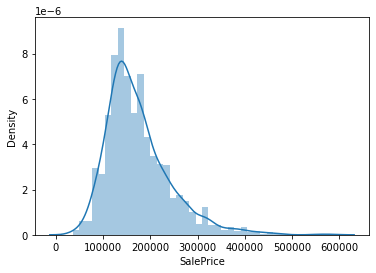

In [528]:
#df['SalePrice'] = np.log1p(df['SalePrice'])
#Checking the distribution of SalePrice
sns.distplot(df['SalePrice'])
plt.show()

**Visualising the numerical variables and linearity with tgt variable**

In [529]:
num_var = df.select_dtypes(include=['int64','float']).columns
print(len(num_var))

24


<Figure size 720x360 with 0 Axes>

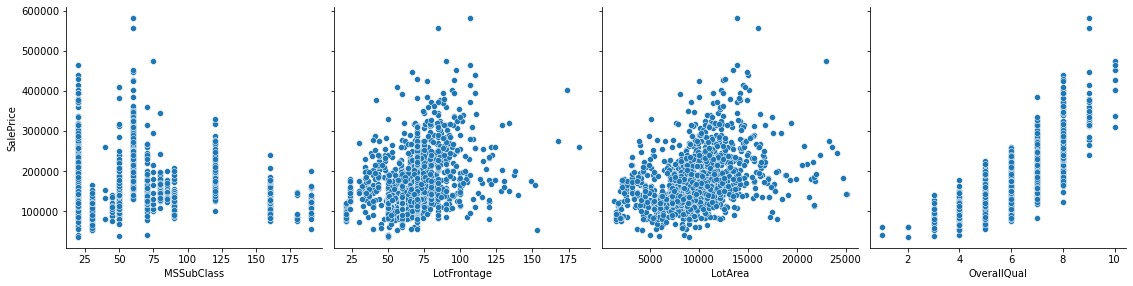

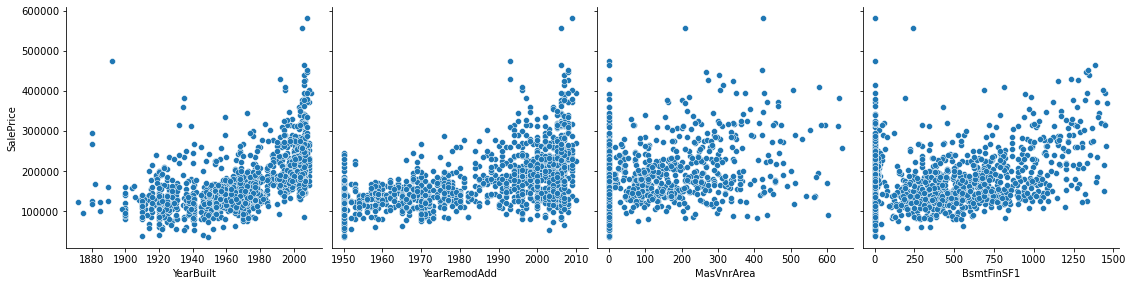

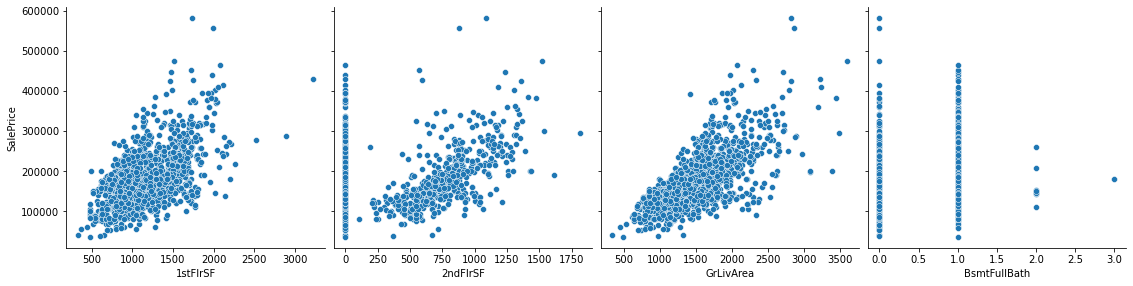

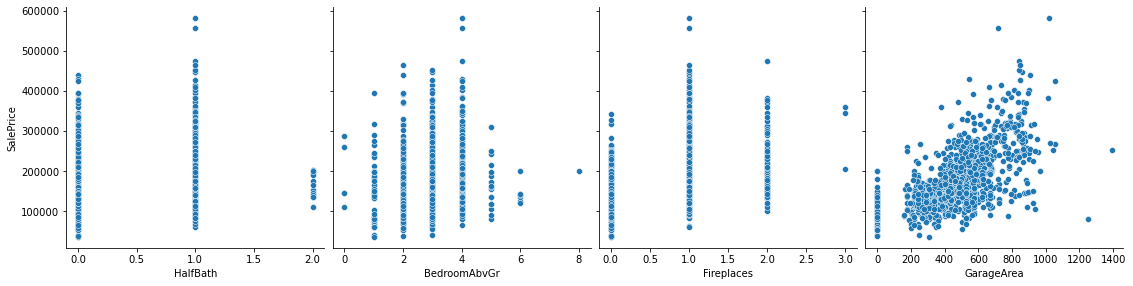

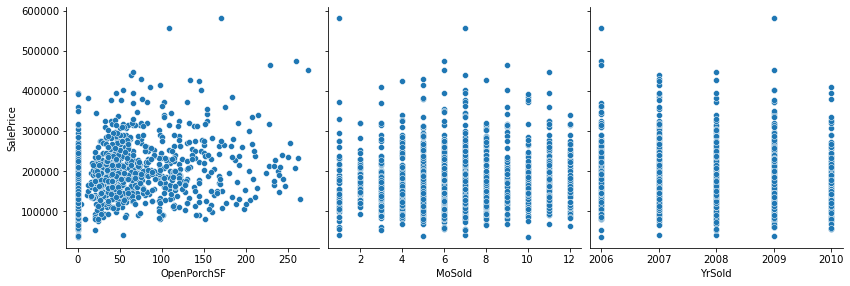

In [530]:
plt.figure(figsize=(10,5))
sns.pairplot(df, x_vars=num_var[0:4], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=num_var[5:9], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=num_var[10:14], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=num_var[15:19], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(df, x_vars=num_var[20:23], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

In [531]:
#Instead of using years as the variable, the age of the house can be concluded. The age will become a numerical variable as compared to the categorical year.
#First we will determine if the house has been remodelled
def Remodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
df['Remodelled'] = df.apply(Remodel, axis=1)
df.head()    

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelled
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,61,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,298,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,0,42,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,0,35,2,2006,WD,Abnorml,140000,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,192,84,12,2008,WD,Normal,250000,0


In [532]:
# Determining the vintage of the house based on its year of building or its remodelling

def HouseAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
df['HouseVintage'] = df.apply(HouseAge, axis=1)
df.head()  

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Remodelled,HouseVintage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Y,0,61,2,2008,WD,Normal,208500,0,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,Y,298,0,5,2007,WD,Normal,181500,0,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Y,0,42,9,2008,WD,Normal,223500,1,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Y,0,35,2,2006,WD,Abnorml,140000,1,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Y,192,84,12,2008,WD,Normal,250000,0,8


In [533]:
#Dropping MoSold 
df.pop('MoSold')

0        2
1        5
2        9
3        2
4       12
        ..
1454    10
1455     8
1456     2
1457     5
1458     4
Name: MoSold, Length: 1358, dtype: int64

In [534]:
# Since we have created new features from YearBuilt, YearRemodAdd and YrSold  we can drop these columns 
df.drop(['YearBuilt', 'YearRemodAdd', 'YrSold'], axis = 1, inplace = True)

In [535]:
df.head() 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,Remodelled,HouseVintage
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,61,WD,Normal,208500,0,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,298,0,WD,Normal,181500,0,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,0,42,WD,Normal,223500,1,6
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,0,35,WD,Abnorml,140000,1,36
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,192,84,WD,Normal,250000,0,8


**Cleaning & Preparing Categorical Data**

In [536]:
# identifying columns with null values in the numerical data

df.select_dtypes(include=['object']).isnull().sum()[df.select_dtypes(include=['object']).isnull().sum()>0]

MasVnrType       7
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      79
GarageFinish    79
GarageQual      79
GarageCond      79
dtype: int64

In [537]:
for col in ('MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    
    df[col]=df[col].fillna('None')

In [538]:
# Dropping columns that have more than 1200 (>80%) values associated to a specific value so that the values are not biased


def SameCatValueHigh():
    samec_high = []
    for col in (df.select_dtypes(include=['object'])):
        if(df[col].value_counts().max() >= 1200):
            samec_high.append(col)
    return samec_high
column_c = SameCatValueHigh()
df.drop(column_c , axis = 1, inplace = True)
df.select_dtypes(include=['object']).head()

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,...,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,Gd,No,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,...,Gd,Gd,ALQ,Unf,Ex,TA,Attchd,RFn,WD,Normal
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,Gd,Mn,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,...,TA,No,ALQ,Unf,Gd,Gd,Detchd,Unf,WD,Abnorml
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,...,Gd,Av,GLQ,Unf,Ex,Gd,Attchd,RFn,WD,Normal


The categorical variables can be further analysed as follows:-
    
**Labelled but Ordered** - 
    
    Utilities: Type of utilities available ['AllPub', 'NoSewr', 'NoSeWa', 'ELO']
	
    LandSlope: Slope of property ['Gtl', 'Mod', 'Sev']	
    
    HouseStyle: Style of dwelling ['1Story', '1.5Fin', '1.5Unf', '2Story', '2.5Fin', '2.5Unf', 'SFoyer', 'SLvl']
    
    ExterQual: Evaluates the quality of the material on the exterior ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    
    ExterCond: Evaluates the present condition of the material on the exterior ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    
    BsmtQual: Evaluates the height of the basement ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    
    BsmtCond: Evaluates the general condition of the basement  ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    
    BsmtExposure: Refers to walkout or garden level walls ['Gd', 'Av', 'Mn', 'No', 'NA']
    
    BsmtFinType1: Rating of basement finished area ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
    
    BsmtFinType2: Rating of basement finished area (if multiple types) ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA']
    
    HeatingQC: Heating quality and condition ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    
    KitchenQual: Kitchen quality ['Ex', 'Gd', 'TA', 'Fa', 'Po']
    
    FireplaceQu: Fireplace quality ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    
    GarageQual: Garage quality  ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    
    GarageCond: Garage condition ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
    
    PoolQC: Pool quality ['Ex', 'Gd', 'TA', 'Fa', 'NA']

Cat_Ord_Var = ['Utilities', 'LandSlope', 'BldgType', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']


**Labelled Categorical Variables** - 

    LotConfig: Lot configuration
    
    Neighborhood: Physical locations within Ames city limits
    
    Condition1: Proximity to various conditions
    
    Condition2: Proximity to various conditions (if more than one is present)
    
    RoofStyle: Type of roof
    
    RoofMatl: Roof material
    
    Exterior1st: Exterior covering on house
    
    Exterior2nd: Exterior covering on house (if more than one material)
    
    MasVnrType: Masonry veneer type
    
    Foundation: Type of foundation
    
    Heating: Type of heating
    
    CentralAir: Central air conditioning
    
    Electrical: Electrical system
    
    Functional: Home functionality (Assume typical unless deductions are warranted)
    
    GarageType: Garage location
    
    GarageFinish: Interior finish of the garage
    
    PavedDrive: Paved driveway
    
    Fence: Fence quality
    
    MiscFeature: Miscellaneous feature not covered in other categories
    
    SaleType: Type of sale
    
    SaleCondition: Condition of sale
    
    BldgType: Type of dwelling
    
    Cat_Lab_Var =['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',     'Electrical', 'Functional' , 'GarageType', 'GarageFinish', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition', 'BldgType']

In [539]:
df['d_LotShape'] = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df['d_ExterQual'] = df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
df['d_BsmtQual'] = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_BsmtExposure'] = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
df['d_BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'None': 0})
df['d_HeatingQC'] = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_KitchenQual'] = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
df['d_GarageFinish'] = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
df['d_BldgType'] = df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 'None': 0 })
df['d_HouseStyle'] = df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
df['d_LotConfig'] = df['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 'None': 0  }) 
df['d_MasVnrType'] = df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
df['d_SaleCondition'] = df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 'Alloca': 0, 'AdjLand': 0, 'None': 0})
                                                                   
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,...,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,...,1,6,5,4,2,1,4,5,1,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,...,4,5,5,3,2,1,1,2,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,...,2,6,5,4,2,1,4,5,1,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,...,1,5,4,4,1,1,4,4,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,...,3,6,5,4,2,1,4,2,1,1


In [540]:
# dropping the old columns 

df = df.drop(['LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'GarageFinish', 'BldgType', 'HouseStyle', 'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,RoofStyle,Exterior1st,...,d_BsmtExposure,d_BsmtFinType1,d_HeatingQC,d_KitchenQual,d_GarageFinish,d_BldgType,d_HouseStyle,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,Norm,7,5,Gable,VinylSd,...,1,6,5,4,2,1,4,5,1,1
1,20,RL,80.0,9600,Veenker,Feedr,6,8,Gable,MetalSd,...,4,5,5,3,2,1,1,2,0,1
2,60,RL,68.0,11250,CollgCr,Norm,7,5,Gable,VinylSd,...,2,6,5,4,2,1,4,5,1,1
3,70,RL,60.0,9550,Crawfor,Norm,7,5,Gable,Wd Sdng,...,1,5,4,4,1,1,4,4,0,0
4,60,RL,84.0,14260,NoRidge,Norm,8,5,Gable,VinylSd,...,3,6,5,4,2,1,4,2,1,1


In [541]:
#creating dummy variables for labelled cat variables

# Creating dummies for MSZoning

d_MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', drop_first = True)
df = pd.concat([df, d_MSZoning], axis = 1)

# Creating dummies for Neighborhood

d_Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', drop_first = True)
df = pd.concat([df, d_Neighborhood], axis = 1)

# Creating dummies for RoofStyle

d_RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', drop_first = True)
df = pd.concat([df, d_RoofStyle], axis = 1)

# Creating dummies for Exterior1st

d_Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', drop_first = True)
df = pd.concat([df, d_Exterior1st], axis = 1)

# Creating dummies for Exterior2nd

d_Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
df = pd.concat([df, d_Exterior2nd], axis = 1)

# Creating dummies for Foundation

d_Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', drop_first = True)
df = pd.concat([df, d_Foundation], axis = 1)

# Creating dummies for GarageType

d_GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', drop_first = True)
df = pd.concat([df, d_GarageType], axis = 1)

# Creating dummies for Condition1

d_Condition1 = pd.get_dummies(df['Condition1'], prefix='Condition1', drop_first = True)
df = pd.concat([df, d_Condition1], axis = 1)

# Creating dummies for ExterCond

d_ExterCond = pd.get_dummies(df['ExterCond'], prefix='ExterCond', drop_first = True)
df = pd.concat([df, d_ExterCond], axis = 1)

# Creating dummies for BsmtFinType2

d_BsmtFinType2 = pd.get_dummies(df['BsmtFinType2'], prefix='BsmtFinType2', drop_first = True)
df = pd.concat([df, d_BsmtFinType2], axis = 1)

# Creating dummies for ExterCond

d_SaleType = pd.get_dummies(df['SaleType'], prefix='SaleType', drop_first = True)
df = pd.concat([df, d_SaleType], axis = 1)

df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,Condition1,OverallQual,OverallCond,RoofStyle,Exterior1st,...,BsmtFinType2_Rec,BsmtFinType2_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,RL,65.0,8450,CollgCr,Norm,7,5,Gable,VinylSd,...,0,1,0,0,0,0,0,0,0,1
1,20,RL,80.0,9600,Veenker,Feedr,6,8,Gable,MetalSd,...,0,1,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,CollgCr,Norm,7,5,Gable,VinylSd,...,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,Crawfor,Norm,7,5,Gable,Wd Sdng,...,0,1,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,NoRidge,Norm,8,5,Gable,VinylSd,...,0,1,0,0,0,0,0,0,0,1


In [542]:
# drop the old columns

df = df.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType', 'Condition1', 'ExterCond', 'BsmtFinType2', 'SaleType'], axis=1)

df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,1stFlrSF,2ndFlrSF,...,BsmtFinType2_Rec,BsmtFinType2_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60,65.0,8450,7,5,196.0,706,150,856,854,...,0,1,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,0.0,978,284,1262,0,...,0,1,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,162.0,486,434,920,866,...,0,1,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,0.0,216,540,961,756,...,0,1,0,0,0,0,0,0,0,1
4,60,84.0,14260,8,5,350.0,655,490,1145,1053,...,0,1,0,0,0,0,0,0,0,1


In [543]:
df.info()
# Dropping top 5 of the first model 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond','BsmtFinSF1'
df.pop('MSSubClass')
df.pop('LotArea')
df.pop('OverallQual')
df.pop('OverallCond')
df.pop('BsmtFinSF1')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 134 entries, MSSubClass to SaleType_WD
dtypes: float64(2), int64(33), uint8(99)
memory usage: 513.2 KB


0       706
1       978
2       486
3       216
4       655
       ... 
1454    410
1455      0
1456    790
1457    275
1458     49
Name: BsmtFinSF1, Length: 1358, dtype: int64

All data is now numeric in nature

**Test Train Split and Scaling**

In [544]:
# Defining X
X = df.drop(['SalePrice'], axis=1)
X.head()

,LotFrontage,MasVnrArea,BsmtUnfSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,...,BsmtFinType2_Rec,BsmtFinType2_Unf,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,65.0,196.0,150,856,854,1710,1,2,1,3,...,0,1,0,0,0,0,0,0,0,1
1,80.0,0.0,284,1262,0,1262,0,2,0,3,...,0,1,0,0,0,0,0,0,0,1
2,68.0,162.0,434,920,866,1786,1,2,1,3,...,0,1,0,0,0,0,0,0,0,1
3,60.0,0.0,540,961,756,1717,1,1,0,3,...,0,1,0,0,0,0,0,0,0,1
4,84.0,350.0,490,1145,1053,2198,1,2,1,4,...,0,1,0,0,0,0,0,0,0,1


In [545]:
# Defining y
y = df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [546]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'BsmtFinType2_Rec', 'BsmtFinType2_Unf', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=128)

In [547]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

**RECURSVE FEATURE ELIMINATION**
We have about 130 columns, hence we will use RFE for the best 20 parameters

In [548]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 20)            
rfe = rfe.fit(X_train, y_train)

In [549]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]

# assign the 20 features selected using RFE to a dataframe and view them

temp_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temp_df = temp_df.loc[temp_df['rfe_support'] == True]
temp_df.reset_index(drop=True, inplace=True)

temp_df

,Variable,rfe_support,rfe_ranking
0,GrLivArea,True,1
1,Fireplaces,True,1
2,GarageArea,True,1
3,d_ExterQual,True,1
4,d_BsmtQual,True,1
5,d_BsmtExposure,True,1
6,d_BsmtFinType1,True,1
7,d_KitchenQual,True,1
8,d_BldgType,True,1
9,d_HouseStyle,True,1


In [550]:
# Assign the 20 columns to X_train_rfe

X_train_rfe = X_train[col]

In [551]:
# Associate the new 20 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]

Now we have eliminated the variables by RFE to get the top 20 variables. We wiluse these as our columns for modelbuilding and selection 

**RIDGE REGRESSION**

In [552]:

from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [553]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)

{'alpha': 50}


In [559]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[28006.41636145  6393.81895846  9221.50752766  8127.28999222
 13506.53500515  7705.02116975  6692.28402543  9205.23230292
 -7832.30812962 -4977.17138499  6615.19941822  5025.59440015
  -866.28371923 -1367.78919321 -5393.74720088  4378.38233976
  1809.81403195  4881.74185375  6824.76622463  5007.76593191]


In [560]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8716842523199083
0.8219766778305122
606679085129.8179
289854226824.17883
638609563.2945452
710427026.5298501


In [561]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,GrLivArea,28006.4164
1,Fireplaces,6393.8190
2,GarageArea,9221.5075
3,d_ExterQual,8127.2900
4,d_BsmtQual,13506.5350
5,d_BsmtExposure,7705.0212
6,d_BsmtFinType1,6692.2840
7,d_KitchenQual,9205.2323
8,d_BldgType,-7832.3081
9,d_HouseStyle,-4977.1714


**LASSO REGRESSION**

In [562]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [563]:
# Printing the best hyperparameter alpha
print(lasso_model_cv.best_params_)

{'alpha': 0.01}


In [564]:
#Fitting Ridge model for alpha = 0.01 and printing coefficients which have been penalised

alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [565]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8733881173337414
0.8160524060671777
598623181731.6307
299500014749.7788
630129664.9806639
734068663.602399


In [566]:
# Put the Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,GrLivArea,30178.1281
1,Fireplaces,5714.4110
2,GarageArea,8743.4629
3,d_ExterQual,7166.6507
4,d_BsmtQual,15608.0582
5,d_BsmtExposure,7977.0748
6,d_BsmtFinType1,7152.9107
7,d_KitchenQual,8971.0628
8,d_BldgType,-8190.4734
9,d_HouseStyle,-5795.3475


In [567]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.716843e-01,8.733881e-01
1,R2 Score (Test),8.219767e-01,8.160524e-01
2,RSS (Train),6.066791e+11,5.986232e+11
3,RSS (Test),2.898542e+11,2.995000e+11
4,MSE (Train),2.527073e+04,2.510238e+04
5,MSE (Test),2.665384e+04,2.709370e+04
